<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP4_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctico TP4 (Histograma de Luminancias)
Para este TP se desea que implementen lo siguiente:

  Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.

  Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
  
  Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen. 

**Bloque 1** - carga de imágenes

In [ ]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021


Cloning into 'cursoPDI2021'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 146 (delta 37), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 30.55 MiB | 11.20 MiB/s, done.
Resolving deltas: 100% (37/37), done.


Bloque 2 - Definición de funciones básicas

In [ ]:
import matplotlib.pyplot as plt
import imageio as img
import numpy as np

#cargo imágenes de prueba
# Import an image from directory:
path="./cursoPDI2021/imagenes/"
ext="png"

def Mostrar(Img1,Txt1,Img2,Txt2,Img3,Txt3):
  plt.figure (dpi=200)
  ax1=plt.subplot(1,3,1)
  plt.imshow(Img1)
  plt.title(Txt1)
  #plt.setp(ax1.get_yticklabels(), fontsize=6)
  #plt.setp(ax1.get_xticklabels(), fontsize=6)
  plt.axis('off')

  ax2=plt.subplot(1,3,2, sharey=ax1)
  plt.imshow(Img2)
  plt.title(Txt2)
  #plt.setp(ax2.get_yticklabels(), visible=False)
  #plt.setp(ax2.get_xticklabels(), fontsize=6)
  plt.axis('off')

  ax3= plt.subplot(1,3,3, sharey=ax1)
  plt.imshow(Img3)
  plt.title(Txt3)
  #plt.setp(ax3.get_yticklabels(), visible=False)
  #plt.setp(ax3.get_xticklabels(), fontsize=6)
  plt.axis('off')
  plt.show()

#normalizar imagenes
def normImg(Img1):
  return 1/255*Img1

def sumaRGB( Img1,Img2):
  #calculo suma RGB de las imágenes
  #resultado=img1+img2
  Resultado=Img1.astype(np.float)+ Img2.astype(np.float)
  return Resultado

def sumaRGBrec (Img1,Img2):
  #calculo suma RGB de las imágenes
  Resultado=Img1.astype(np.float) + Img2.astype(np.float)
  Resultado=np.clip(Resultado,0,255.)
  return Resultado

def restaRGB( Img1,Img2):
  #calculo resta RGB de las imágenes
  #resultado=img1-img2
  Resultado=Img1.astype(np.float)- Img2.astype(np.float)
  return Resultado

def restaRGBrec(Img1, Img2):
  #calculo suma RGB de las imágenes
  #resultado=img1+img2
  Resultado=Img1.astype(np.float)- Img2.astype(np.float)
  Resultado=np.clip(Resultado,0,255)#recorto los valores negativos
  return Resultado

def sumaRGBprom(Img1,Img2):
  #calculo suma RGB de las imágenes previamente promediadas
  Resultado=Img1.astype(np.float)/2+Img2.astype(np.float)/2
  Resultado=np.clip(Resultado,0,255)
  return Resultado

def restaRGBprom(Img1,Img2):
  #calculo suma RGB de las imágenes previamente promediadas
  Resultado=Img1.astype(np.float)/2 - Img2.astype(np.float)/2
  Resultado=np.clip(Resultado,0,255)
  return Resultado

#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],
                    [0.595716,-0.274453,-0.321263],
                    [0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image

def YIQ_TO_RGB(YIQImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[1,0.9663,0.6210],
                    [1,-0.2721,-0.6474],
                    [1,-0.1070,1.7046]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  RGB_image=np.zeros(YIQImage.shape, dtype=float)
  RGB_image=np.dot(YIQImage,RGB2YIQ.T.copy())
  return RGB_image

def sumaYIQ(Img1, Img2):
  input_tam=Img1.shape
  #Resultado=np.zeros(input_tam, dtype=float)
  yiq3=np.zeros(input_tam, dtype=float)

  #normalizo la imagen de entrada
  nImg1=1/255*Img1.astype('float') #la imagen queda en tipo float
  nImg2=1/255*Img2.astype('float') #la imagen queda en tipo float
  yiq1=RGB_TO_YIQ (nImg1)
  yiq2=RGB_TO_YIQ (nImg2)

  #sumo las imágenes con cada canal por separado
  #se interpolan los canales IQ mediante:
  #IC= (YA * IA + YB * IB) / (YA + YB)
  #QC= (YA * QA + YB * QB) / (YA + YB)
  #yiq3[:,:,0]=yiq1[:,:,0]/2+yiq2[:,:,0]/2 #suma el canal Y promediando
  #yiq3[:,:,1]=yiq1[:,:,1]+yiq2[:,:,1] 
  #yiq3[:,:,2]=yiq1[:,:,2]+yiq2[:,:,2] 
  
  yiq3[:,:,0]=yiq1[:,:,0]+yiq2[:,:,0] #luego hay que recortar
  yiq3[:,:,1]=(yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]* yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
  yiq3[:,:,2]=(yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]* yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])
  #print (yiq3)

  #recorto los valores extremos y converito nuevamente a RGB
  yiq3[:,:,0]=np.clip(yiq3[:,:,0],0,1) #recorto los valores Y
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5957,.5957) #recorto los valores I
  yiq3[:,:,2]=np.clip(yiq3[:,:,2],-.5226,.5226) #recorto los valores Q
  Img3= YIQ_TO_RGB(yiq3)
  #print (yiq3)

  #desnormalizar
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  return Img3

  #desnormalizar
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  return Img3


#ContarValores(): cuenta valores contenidos en una lista basado en otra lista con las escalas (bins)
#Lista: lista que contiene los valores a calcular el histograma.
#Bins: lista con los rangos de valores a usar como rangos de cada Bin
#   Al hacer "lista < valor" se produce otra lista cuyo contenido es booleano
#   pero y cuyos valores True cumplen con la condición
#   el resultado de la línea completa es una máscara booleana donde aparecen valores True 
#   en las posiciones cuyos valores se encuentran dentro del rango establecido por los bins

def ContarValores(Lista, lista_Bins):
  size=len(lista_bins)
  cont = np.zeros(size)
  #cont = np.zeros(N_bins+1)
  for i in range (0, (size -1)):
#   print(np.count_nonzero(Lista>=Bins[i]) & (Lista<Bins[i+1]).sum())
    cont[i]=np.count_nonzero(Lista>=lista_bins[i]) & (Lista<lista_bins[i+1]).sum()
  return cont


#Funciones usadas para el ajuste del canal Y por coeficiente alfa y por función

#ClipYIQ(): toma una imagen en YIQ y aplica los coeficientes de recorte a los valores para mantenerlos en el rango YIQ 
def ClipYIQ(ImgYIQ):
  ImgYIQ[:,:,0]=np.clip(ImgYIQ[:,:,0],0,1) #recorto los valores Y
  ImgYIQ[:,:,1]=np.clip(ImgYIQ[:,:,1],-.5957,.5957) #recorto los valores I
  ImgYIQ[:,:,1]=np.clip(ImgYIQ[:,:,1],-.5226,.5226) #recorto los valores Q
  return ImgYIQ


#escalaYIQparte1(): realiza la conversión de RGB a YIQ 
def escalaYIQpartel(RGBImage):
  YIQimage=np.zeros(RGBImage.shape, dtype=float)

  #normalizo la imagen de entrada
  nRGBImage=1/255*RGBImage.astype('float') #la imagen queda en tipo float
  YIQimage=RGB_TO_YIQ (nRGBImage)
  return YIQimage
  

#escalaYIQparte2(): realiza la conversión de la imagen YIQ a RGB, y devuelve una imagen RGB desnormalizada lista para mostrar
def escalaYIQparte2 (YIQimage):
  #Img3= YIQ_TO_RGB(yiq3)
  RGBResultImage= YIQ_TO_RGB(YIQimage)

  #desnormalizar
  RGBResultImage=255*RGBResultImage
  RGBResultImage=np.rint(RGBResultImage)  #redondeo a valores enteros
  RGBResultImage=np.clip(RGBResultImage,0,255) #recorto los valores que superen 255
  return RGBResultImage


**Bloque 2 - Histograma de luminancia**

Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.

leyendo archivo: ./cursoPDI2021/imagenes/milo5r.png (480, 853, 3)


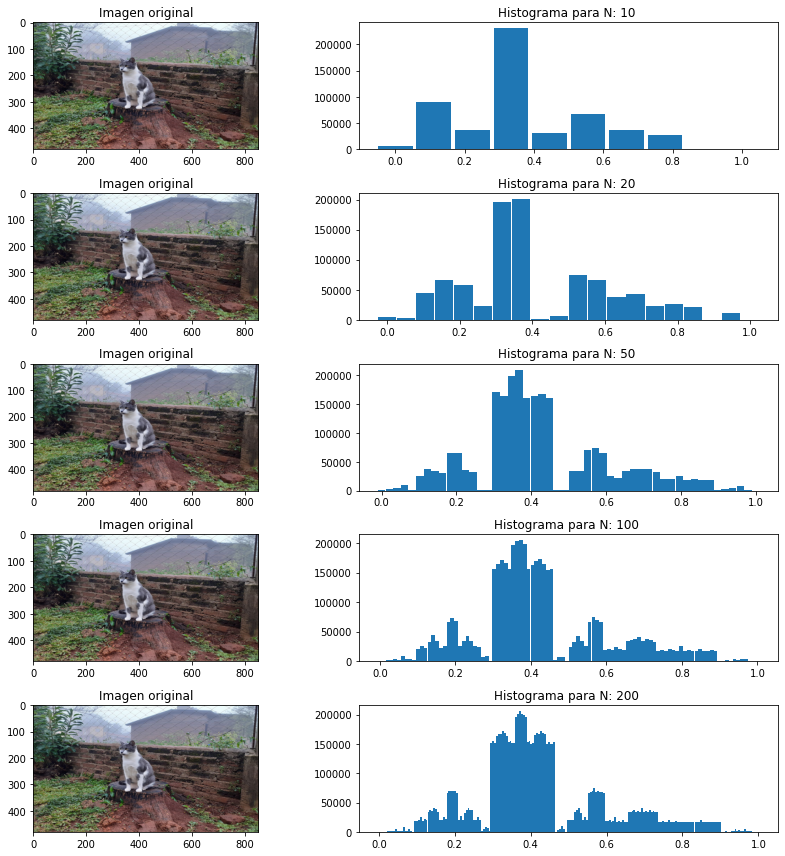

In [ ]:
#Procurar buscar imágenes que tengan el mismo tamaño
archi1 = "milo5r" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]


#Lee imagen formato actual
Img1=img.imread(f"{path}{archi1}.{ext}")      #lee con imageio
input_tam=Img1.shape
print("leyendo archivo:", f"{path}{archi1}.{ext}", input_tam)


input_tam=Img1.shape
yiq3=np.zeros(input_tam, dtype=float)
nImg1=1/255*Img1.astype('float') #normalizo la imagen de entrada
yiq1=RGB_TO_YIQ (nImg1)
#yiq1[:,:,0]=np.clip(yiq1[:,:,0],0,1) #recorto los valores Y

#n=10
n_bins=10
lista_bins=np.linspace(0,1,n_bins)
histo=ContarValores(yiq1[:,:,0],lista_bins)

#figura base
fig, axs = plt.subplots(5, 2, tight_layout=True,figsize=(12, 12))

#imagen original
axs[0][0].imshow(Img1)
axs[0][0].set_title("Imagen original")
#histograma
width=1/n_bins
rects1 = axs[0][1].bar(lista_bins, histo, width, label='histograma')
axs[0][1].set_title("Histograma para N: {} " .format(n_bins))


#n=20
n_bins=20
lista_bins=np.linspace(0,1,n_bins)
histo=ContarValores(yiq1[:,:,0],lista_bins)

#imagen original
axs[1][0].imshow(Img1)
axs[1][0].set_title("Imagen original")
#histograma
width=1/n_bins
rects1 = axs[1][1].bar(lista_bins, histo, width, label='histograma')
axs[1][1].set_title("Histograma para N: {} " .format(n_bins))

#n=50
n_bins=50
lista_bins=np.linspace(0,1,n_bins)
histo=ContarValores(yiq1[:,:,0],lista_bins)

#imagen original
axs[2][0].imshow(Img1)
axs[2][0].set_title("Imagen original")
#histograma
width=1/n_bins
rects1 = axs[2][1].bar(lista_bins, histo, width, label='histograma')
axs[2][1].set_title("Histograma para N: {} " .format(n_bins))

#n=100
n_bins=100
lista_bins=np.linspace(0,1,n_bins)
histo=ContarValores(yiq1[:,:,0],lista_bins)

#imagen original
axs[3][0].imshow(Img1)
axs[3][0].set_title("Imagen original")
#histograma
width=1/n_bins
rects1 = axs[3][1].bar(lista_bins, histo, width, label='histograma')
axs[3][1].set_title("Histograma para N: {} " .format(n_bins))


#n=200
n_bins=200
lista_bins=np.linspace(0,1,n_bins)
histo=ContarValores(yiq1[:,:,0],lista_bins)

#imagen original
axs[4][0].imshow(Img1)
axs[4][0].set_title("Imagen original")
#histograma
width=1/n_bins
rects1 = axs[4][1].bar(lista_bins, histo, width, label='histograma')
axs[4][1].set_title("Histograma para N: {} " .format(n_bins))

plt.show()

**análisis del resultado:**
para la imagen elegida se observa que el histograma va ganandao resolución a medida que aumentan los bins. Con pocos bins se pierde la forma del histograma

**Parte 2 - escalar Y por medio de un coeficiente alfa**

 Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.


leyendo archivo: ./cursoPDI2021/imagenes/rio_uruguay_3.png (480, 853, 3)
leyendo archivo: ./cursoPDI2021/imagenes/milo4r.png (480, 853, 3)


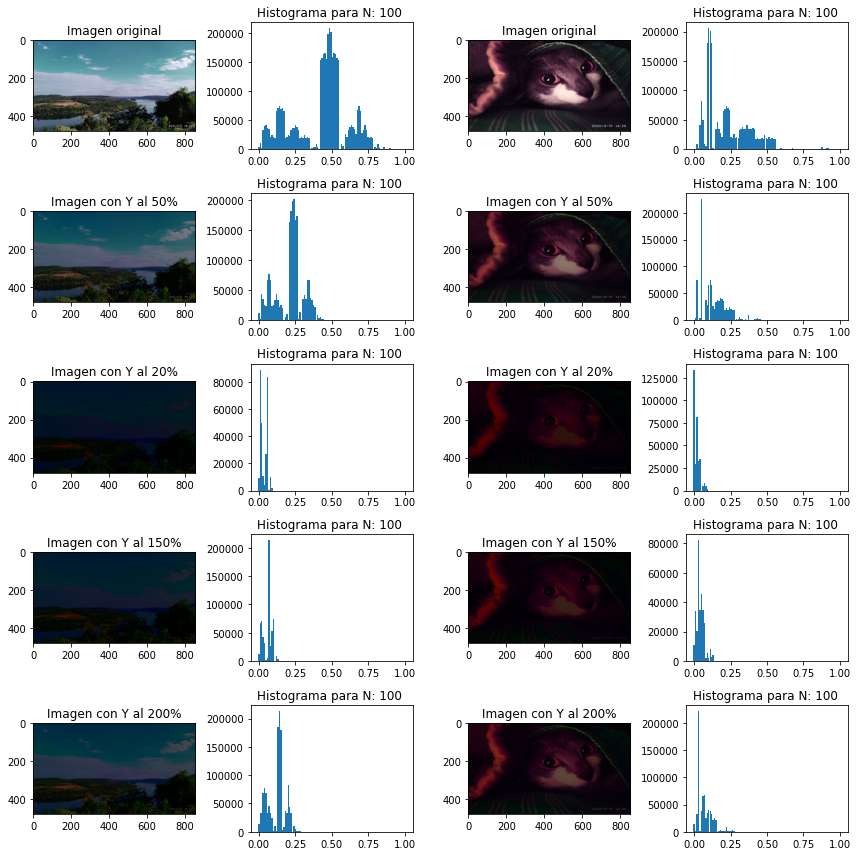

In [ ]:
#Definición de algunas funciones utilizadas en esta parte

#escalaYIQparte1(): realiza la conversión de RGB a YIQ y aplica el factor de ajuste alfa
#en el canal de la luminancia
def escalaYIQpartel(RGBImage):
  YIQimage=np.zeros(RGBImage.shape, dtype=float)

  #normalizo la imagen de entrada
  nRGBImage=1/255*RGBImage.astype('float') #la imagen queda en tipo float
  YIQimage=RGB_TO_YIQ (nRGBImage)
  return YIQimage
  

#escalaYIQparte2(): realiza la conversión de la imagen YIQ a RGB, y devuelve una imagen RGB
#desnormalizada lista para mostrar
def escalaYIQparte2 (YIQimage) :
  #Img3= YIQ_TO_RGB(yiq3)
  RGBResultImage= YIQ_TO_RGB(YIQimage)
#desnormalizar
  RGBResultImage=255*RGBResultImage
  RGBResultImage=np.rint(RGBResultImage)  #redondeo a valores enteros
  RGBResultImage=np.clip(RGBResultImage,0,255) #recorto los valores que superen 255
  return RGBResultImage

#Procurar buscar imágenes que tengan el mismo tamaño
archi1 = "rio_uruguay_3" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
archi2 = "milo4r" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
###operacion = "suma RGB" #@param [ "suma RGB","suma RGB recortada","suma RGB promediada","resta RGB","resta RGB recortada","resta RGB promediada","suma YIQ","suma YIQ promediada","if-lighter", "if-darker"]


#Lee imagen con el formato actual
Img1=img.imread(f"{path}{archi1}.{ext}")      #lee con imageio
Img2=img.imread(f"{path}{archi2}.{ext}")      #lee con imageio
input_tam=Img1.shape
print("leyendo archivo:", f"{path}{archi1}.{ext}", input_tam)
print("leyendo archivo:", f"{path}{archi2}.{ext}", Img2.shape)


#figura base
fig, axs = plt.subplots(5, 4, tight_layout=True,figsize=(12, 12))

#genero las figuras
alfas={0:1.,1:0.5,2:0.2,3:1.5,4:2.}
titulos={0:"original",1:"con Y al 50%",2:"con Y al 20%",3:"con Y al 150%",4:"con Y al 200%"}
#Para la imagen 1
YIQImage= escalaYIQpartel(Img1)

for key, value in alfas.items():
  #YIQImage= escalaYIQpartel(Img1)
  YIQimgaux=YIQImage
  #aplico el alfa a la imagen en YIQ y reconvierto a RGB manualmente
  YIQimgaux[:,:,0]=YIQimgaux[:,:,0]*value #ajusto el canal de luminancia Y

  #recorto los valores extremos y convierto nuevamente a RGB
  #APAGAR la línea para ver el efecto de saturación del canal de Luminancia
  YIQimgaux=ClipYIQ(YIQimgaux)


  RGBImage=  escalaYIQparte2(YIQimgaux)
  axs[key][0].imshow(RGBImage.astype('uint8'))
  axs[key][0].set_title("Imagen {}" .format(titulos[key]))

  #histograma
  n_bins=100
  width=1/n_bins
  lista_bins=np.linspace(0,1,n_bins)
  histo=ContarValores(YIQImage[:,:,0],lista_bins)
  rects1 = axs[key][1].bar(lista_bins, histo, width, label='histograma')
  axs[key][1].set_title("Histograma para N: {} " .format(n_bins))

#Para la imagen 2
YIQImage= escalaYIQpartel(Img2)
for key, value in alfas.items():
  #YIQImage= escalaYIQpartel(Img2,value)'
  YIQimgaux=YIQImage
  #aplico el alfa a la imagen en YIQ y reconvierto a RGB manualmente
  YIQimgaux[:,:,0]=YIQimgaux[:,:,0]*value #ajusto el canal de luminancia Y

  #recorto los valores extremos y convierto nuevamente a RGB
  #APAGAR la línea para ver el efecto de saturación del canal de Luminancia
  YIQimgaux=ClipYIQ(YIQimgaux)
  RGBImage=  escalaYIQparte2(YIQimgaux)
 
  axs[key][2].imshow(RGBImage.astype('uint8'))
  axs[key][2].set_title("Imagen {}" .format(titulos[key]))

  #histograma
  n_bins=100
  width=1/n_bins
  lista_bins=np.linspace(0,1,n_bins)
  histo=ContarValores(YIQImage[:,:,0],lista_bins)
  rects1 = axs[key][3].bar(lista_bins, histo, width, label='histograma')
  axs[key][3].set_title("Histograma para N: {} " .format(n_bins))

plt.show()

**Conclusión**

Escalando el canal de luminancia se obtiene un estrechamiento o ensanchamiento del histograma de la misma.
Pero los colores claros siguen siendo claros y los oscuros más oscuros. 


**PArte 3 - Ajustar canal Y por medio de funciones**


  Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen. 


leyendo archivo: ./cursoPDI2021/imagenes/rio_uruguay_3.png (480, 853, 3)
leyendo archivo: ./cursoPDI2021/imagenes/milo4r.png (480, 853, 3)


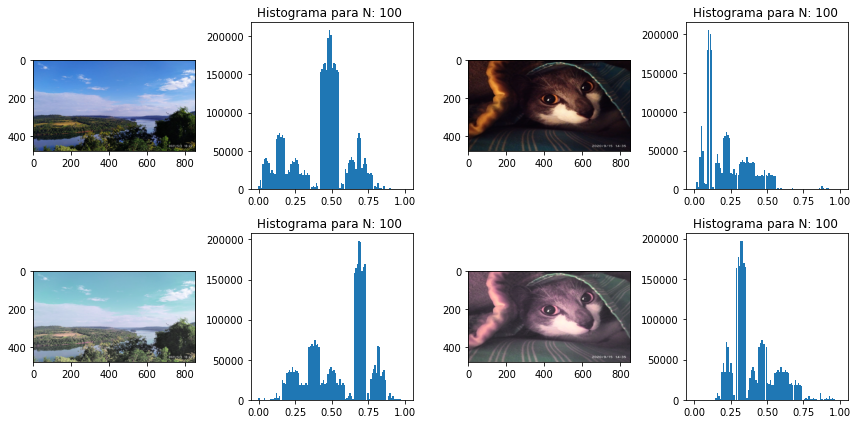

In [93]:
#Procurar buscar imágenes que tengan el mismo tamaño
archi1 = "rio_uruguay_3" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
archi2 = "milo4r" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
AlfaEq = "Raiz cuadrada" #@param [ "passthrough","lineal por trazos","Raiz cuadrada","Potencia cuadratica"]
LinMin = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}
LinMax = 1 #@param {type:"slider", min:0, max:1, step:0.1}
###operacion = "suma RGB" #@param [ "suma RGB","suma RGB recortada","suma RGB promediada","resta RGB","resta RGB recortada","resta RGB promediada","suma YIQ","suma YIQ promediada","if-lighter", "if-darker"]



#Lee imagen con el formato actual
Img1=img.imread(f"{path}{archi1}.{ext}")      #lee con imageio
Img2=img.imread(f"{path}{archi2}.{ext}")      #lee con imageio
input_tam=Img1.shape
print("leyendo archivo:", f"{path}{archi1}.{ext}", input_tam)
print("leyendo archivo:", f"{path}{archi2}.{ext}", Img2.shape)


#figura base
fig, axs = plt.subplots(2, 4, tight_layout=True,figsize=(12, 6))

#Para la imagen 1
YIQImage1= escalaYIQpartel(Img1)
YIQImage2= escalaYIQpartel(Img2)

#trabajo sobre una imagen YIQ auxiliar
YIQimgaux1=YIQImage1.copy()
YIQimgaux2=YIQImage2.copy()

#función de interpolacion lineal usada en el ajuste de Y lineal a trozos
#m=1/(LinMax-LinMin) #pendiente de la recta de ajuste
#b=-LinMin/(LinMax-LinMin) #ordenada al origen
#y=x/(LinMax-LinMin)-LinMin/(LinMax-LinMin)
def recta(x):
  return x/(LinMax-LinMin)-LinMin/(LinMax-LinMin)

#vectorizo la función par apoder aplicarla al arreglo
vrecta=np.vectorize(recta)  #vectorizo la función de interpolacion

if (AlfaEq =="passthrough"):
  print("Img OUT = Img IN")
elif (AlfaEq =="alfa"):
  YIQimgaux1[:,:,0]=YIQimgaux1[:,:,0]*value #ajusto el canal de luminancia Y
  YIQimgaux2[:,:,0]=YIQimgaux2[:,:,0]*value #ajusto el canal de luminancia Y
elif (AlfaEq == "lineal por trazos"):
  MaskMin1= YIQimgaux1[:,:,0] >= LinMin  #genera mascara que deja pasar valores mayores a LinMin
  YIQimgaux1[:,:,0]=vrecta(YIQimgaux1[:,:,0]) #ajusto el canal de luminancia Y aplicando la ecuación de la recta a lo largo del canal Y
  YIQimgaux1[:,:,0]=MaskMin1*YIQimgaux1[:,:,0] #enmascaro valores mínimox

  MaskMin2= YIQimgaux2[:,:,0] >= LinMin  #genera mascara que deja pasar valores mayores a LinMin
  YIQimgaux2[:,:,0]=vrecta(YIQimgaux2[:,:,0]) #ajusto el canal de luminancia Y aplicando la ecuación de la recta a lo largo del canal Y
  YIQimgaux2[:,:,0]=MaskMin2*YIQimgaux2[:,:,0] #enmascaro valores mínimox
elif (AlfaEq == "Raiz cuadrada"):
  YIQimgaux1[:,:,0]=np.sqrt(YIQimgaux1[:,:,0])
  YIQimgaux2[:,:,0]=np.sqrt(YIQimgaux2[:,:,0])
elif (AlfaEq == "Potencia cuadratica"):
  YIQimgaux1[:,:,0]=YIQimgaux1[:,:,0]*YIQimgaux1[:,:,0]
  YIQimgaux2[:,:,0]=YIQimgaux2[:,:,0]*YIQimgaux2[:,:,0]


#recorto los valores extremos y convierto nuevamente a RGB
#APAGAR la línea para ver el efecto de saturación del canal de Luminancia
YIQimgaux1= ClipYIQ(YIQimgaux1)
RGBImageaux1=  escalaYIQparte2(YIQimgaux1)

YIQimgaux2= ClipYIQ(YIQimgaux2)
RGBImageaux2=  escalaYIQparte2(YIQimgaux2)

#imagen original + histograma1
axs[0][0].imshow(Img1)

#histograma
n_bins=100
width=1/n_bins
lista_bins=np.linspace(0,1,n_bins)

histo1=ContarValores(YIQImage1[:,:,0],lista_bins)
rects1 = axs[0][1].bar(lista_bins, histo1, width, label='histograma')
axs[0][1].set_title("Histograma para N: {} " .format(n_bins))

#imagen origina2 + histograma2
axs[0][2].imshow(Img2)
histo2=ContarValores(YIQImage2[:,:,0],lista_bins)
rects1 = axs[0][3].bar(lista_bins, histo2, width, label='histograma')
axs[0][3].set_title("Histograma para N: {} " .format(n_bins))



#imagen 1 +histograma , con el factor de ajuste de Y elegido
axs[1][0].imshow(RGBImageaux1.astype('uint8'))

#histograma
n_bins=100
width=1/n_bins
lista_bins=np.linspace(0,1,n_bins)
histo1=ContarValores(YIQimgaux1[:,:,0],lista_bins)
rects1 = axs[1][1].bar(lista_bins, histo1, width, label='histograma')
axs[1][1].set_title("Histograma para N: {} " .format(n_bins))


#imagen2 +histograma , con el factor de ajuste de Y elegido
axs[1][2].imshow(RGBImageaux2.astype('uint8'))
histo2=ContarValores(YIQimgaux2[:,:,0],lista_bins)
rects1 = axs[1][3].bar(lista_bins, histo2, width, label='histograma')
axs[1][3].set_title("Histograma para N: {} " .format(n_bins))

plt.show()
fig.savefig('plot_completo.png')

**Conclusiones:**


**passthrough**:


  la salida es igual a la entrada, pero pasa por el proceso de conversión: 
  
  RGB -> normalización RGB -> RGB a YIQ-> recorte YIQ -> YIQ a RGB -> desnormalización RGB.

  
  Se aprecia una pequeña diferencia en el tono de la imagen. Al momento no tengo una explicación definitiva a este efecto.
  Infiero que debe tener algo que ver los errores números de conversión entre float -> int en las sucesivas etapas, sumado al "clampeo" en YIQ. 

**lineal por trazos:**


 Si se fija el límite superior en un valor bajo,cercano al mínimo la imagen se satura pronto.
  Si se fija el límite inferior en un valor alto, cercano al máximo la imagen se oscurece

**raiz cuadrada:**


  El efecto de esta función de ecualización es de expandir el histograma de luminancia en todo el rango, las imágenes ganan un poco más de luminocidad general, los detalles oscuros se notan mejor y no se satura la imagen.

**Potencia cuadrática:**


  El efecto de esta función de ecualización se puede analizar desde el punto de vista matemático: como al elevar al cuadrado un número menor a 1, hace que el valor resultante termine siendo más pequeño que el original, el efecto de esta curva es de correr y comprimir el histograma de luminancia hacia el cero.

